In [119]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

width = 12
height = 7
plt.rcParams["figure.figsize"] = (width, height)

import graphviz
import pandas as pd
import numpy as np
import tflscripts
import pickle

configuration = tflscripts.read_configuration()
df = pd.read_pickle('results.p')
df = df.loc[df.type_of_transfer != 'No transfer']
df['space_transfer'] = df['source_room'] + ' – ' + df['target_room']

In [120]:
good_df = df.loc[df.accuracy_negative >= 0.95]
good_df = good_df.loc[good_df.accuracy_positive >= 0.75]

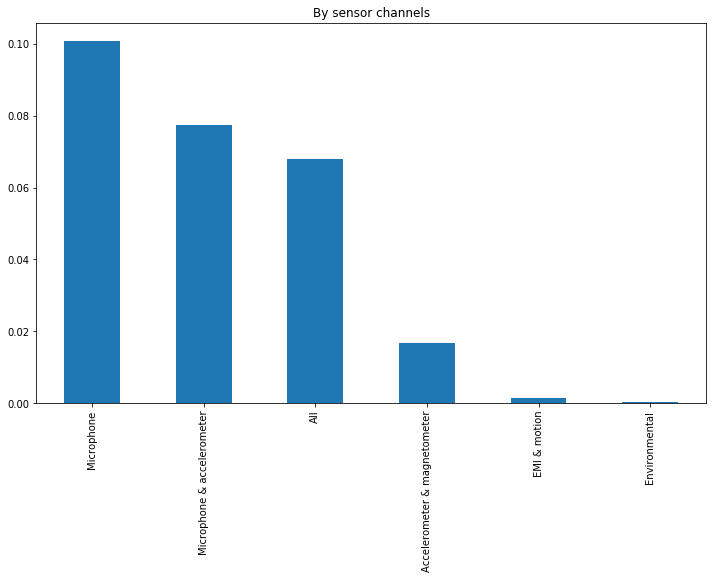

In [121]:
by_features = good_df.features_name.value_counts() / df.features_name.value_counts()
by_features = by_features.sort_values(ascending=False)
by_features.plot.bar()
plt.title('By sensor channels')

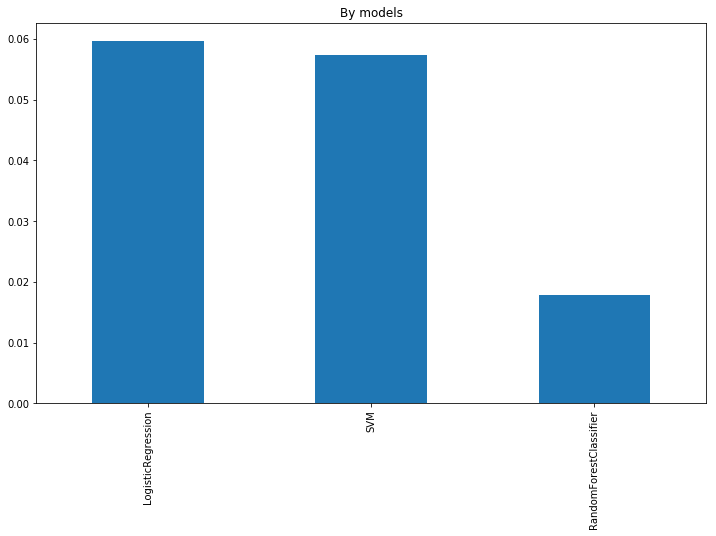

In [122]:
by_models = good_df.classifier.value_counts() / df.classifier.value_counts()
by_models = by_models.sort_values(ascending=False)
by_models.plot.bar()
plt.title('By models')

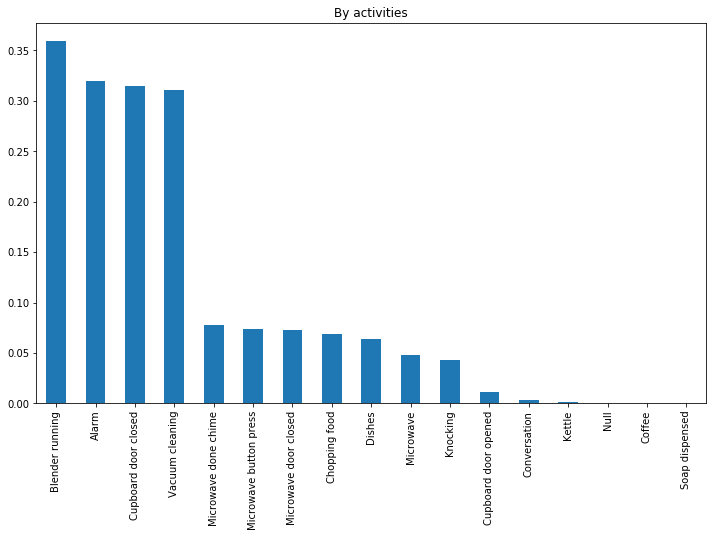

In [123]:
by_activities = good_df.label.value_counts() / df.label.value_counts()
by_activities = by_activities.sort_values(ascending=False)
by_activities.plot.bar()
plt.title('By activities')

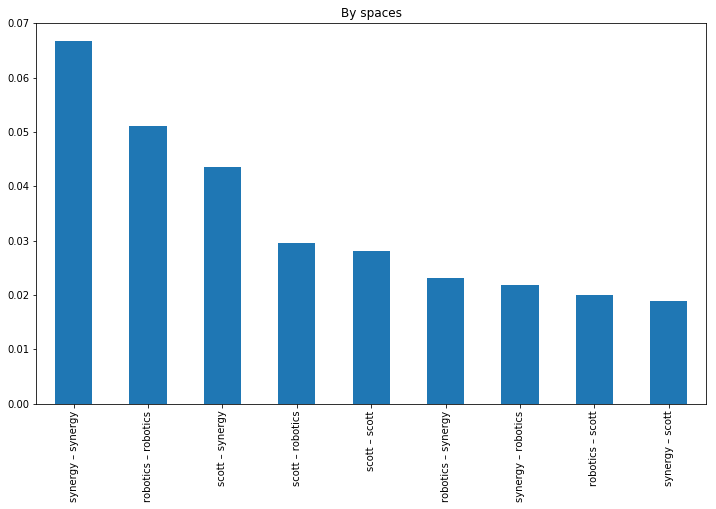

In [124]:
by_activities = good_df.space_transfer.value_counts() / df.space_transfer.value_counts()
by_activities = by_activities.sort_values(ascending=False)
by_activities.plot.bar()
plt.title('By spaces')

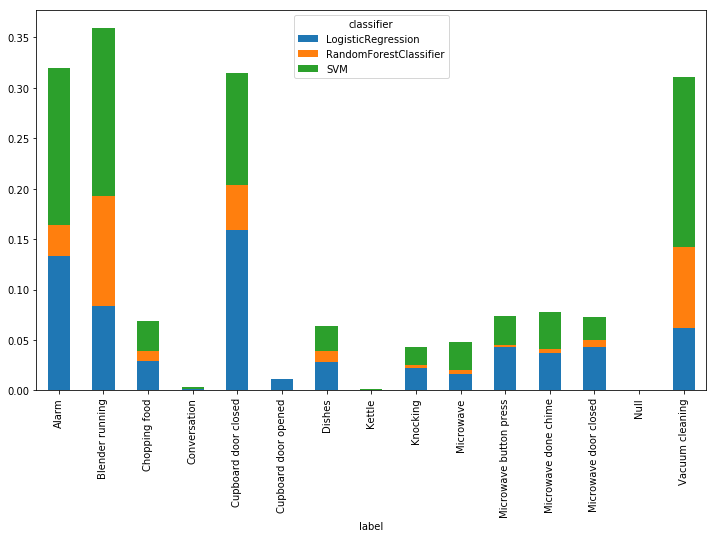

In [129]:
counts = good_df[['label', 'classifier']].groupby(['label', 'classifier']).size()
counts = pd.DataFrame(counts).reset_index()
divide_by = pd.Series([df.label.value_counts()[label] for label in counts['label']])
divide_by.index = counts.index
counts[0] = counts[0] / divide_by
counts = counts.pivot_table(values=0, columns='classifier', index='label')
# counts = counts.sort_values(by=['SVM', 'LogisticRegression'], ascending=False)
counts.plot.bar(stacked=True)

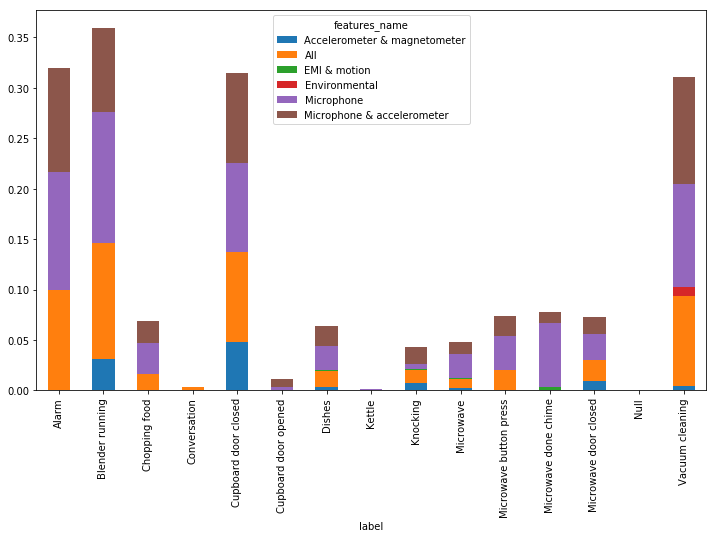

In [130]:
counts = good_df[['label', 'features_name']].groupby(['label', 'features_name']).size()
counts = pd.DataFrame(counts).reset_index()
divide_by = pd.Series([df.label.value_counts()[label] for label in counts['label']])
divide_by.index = counts.index
counts[0] = counts[0] / divide_by
counts = counts.pivot_table(values=0, columns='features_name', index='label')
# counts = counts.sort_values(by=['All', 'Microphone'], ascending=False)
counts.plot.bar(stacked=True)

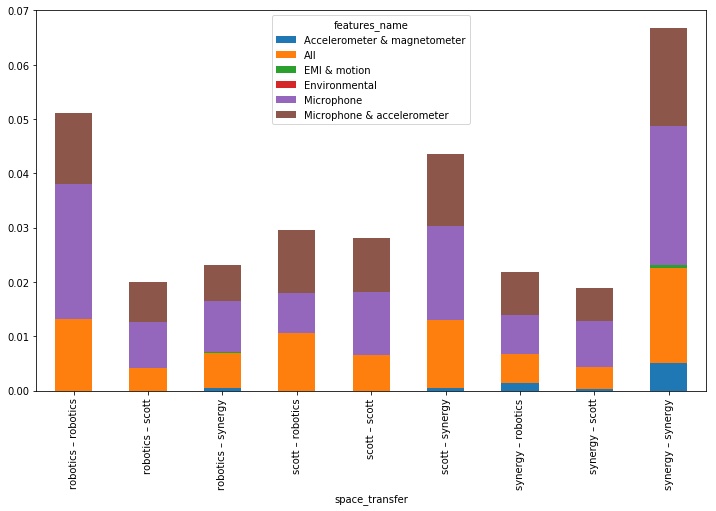

In [131]:
counts = good_df[['space_transfer', 'features_name']].groupby(['space_transfer', 'features_name']).size()
counts = pd.DataFrame(counts).reset_index()
divide_by = pd.Series([df.space_transfer.value_counts()[space_transfer] for space_transfer in counts['space_transfer']])
divide_by.index = counts.index
counts[0] = counts[0] / divide_by
counts = counts.pivot_table(values=0, columns='features_name', index='space_transfer')
# counts = counts.sort_values(by=['All', 'Microphone'], ascending=False)
counts.plot.bar(stacked=True)

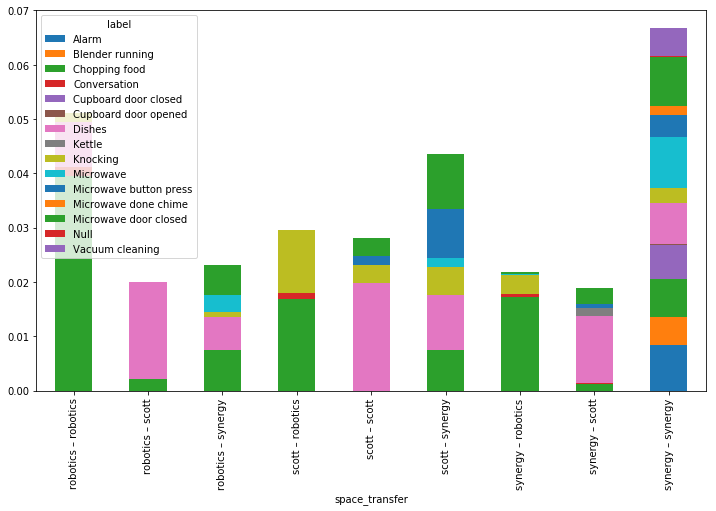

In [132]:
counts = good_df[['space_transfer', 'label']].groupby(['space_transfer', 'label']).size()
counts = pd.DataFrame(counts).reset_index()
divide_by = pd.Series([df.space_transfer.value_counts()[space_transfer] for space_transfer in counts['space_transfer']])
divide_by.index = counts.index
counts[0] = counts[0] / divide_by
counts = counts.pivot_table(values=0, columns='label', index='space_transfer')
# counts = counts.sort_values(by=['Dishes'], ascending=False)
counts.plot.bar(stacked=True)